In [2]:
# Importing some libraries beforehand
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# Import the dataset(ds)
ds = pd.read_csv('1655023Pet shop.csv')
ds.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size
0,1,67648,health,off_brand,3.5,12,33.0,42.3,852
1,2,120421,other,off_brand,4.5,10,16.0,54.3,1045
2,3,95242,toys,off_brand,2.9,6,25.0,88.2,1461
3,4,105632,health,off_brand,2.6,8,NaN,5.0,1579
4,5,221627,toys,off_brand,4.9,11,25.0,57.0,2643


Assignment 1: (15%)

First, turn the categorical variables into dummy variables and explain which category you chose as the reference category. Second, run a regression model where all independent variables are included in a single model. Use Cook’s D to find out if there are any outliers. Note: you will first have to remove missing values first in order to get Cooks D to work.

After you identified the relevant outliers, go back to the original data and turn these outliers into missing values.

In [15]:
# First, turn the categorical variables into dummy variables
product_category_dummies = pd.get_dummies(ds['product_category'])
product_quality_dummies = pd.get_dummies(ds['quality'])
ds_dummies = pd.concat([ds,product_category_dummies,product_quality_dummies], axis=1)
ds_dummies.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,food,health,other,toys,off_brand,premium
0,1,67648,health,off_brand,3.5,12,33.0,42.3,852,False,True,False,False,True,False
1,2,120421,other,off_brand,4.5,10,16.0,54.3,1045,False,False,True,False,True,False
2,3,95242,toys,off_brand,2.9,6,25.0,88.2,1461,False,False,False,True,True,False
3,4,105632,health,off_brand,2.6,8,NaN,5.0,1579,False,True,False,False,True,False
4,5,221627,toys,off_brand,4.9,11,25.0,57.0,2643,False,False,False,True,True,False


In [20]:
# Calculate the number of categories in 'product_category'
category_counts = ds['product_category'].value_counts()

category_counts

product_category
health    858
toys      824
other     296
food      272
Name: count, dtype: int64

In [21]:
# Calculate the number of categories in 'product_category'
quality_counts = ds['quality'].value_counts()

quality_counts

quality
off_brand    1263
premium       876
Name: count, dtype: int64

In my analysis, I chose other and off_brand as my reference categories to compare product_category and quality.
I chose other because it's a mixed category and health and toys were almost the same in numbers. This way, I could easily see how the special types health, toys or food did against a mix of everything else.

I went with off_brand as the standard for quality because we had more of these than premium ones. This lets me show if premium really means more sales compared to the usual off-brand products.

In [23]:
# Check for missing values in the dataset
missing_values = ds_dummies.isnull().sum()
missing_values

Unnamed: 0            0
products_sold         0
product_category      0
quality             111
satisfaction          0
discount              0
retail_price        157
perc_physical        64
market_size           0
food                  0
health                0
other                 0
toys                  0
off_brand             0
premium               0
dtype: int64

In [19]:
#dropping the missing values
ds_clean = ds_dummies.dropna()
ds_clean.isnull().sum()

Unnamed: 0          0
products_sold       0
product_category    0
quality             0
satisfaction        0
discount            0
retail_price        0
perc_physical       0
market_size         0
food                0
health              0
other               0
toys                0
off_brand           0
premium             0
dtype: int64

In [22]:
ds_clean.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,food,health,other,toys,off_brand,premium
0,1,67648,health,off_brand,3.5,12,33.0,42.3,852,False,True,False,False,True,False
1,2,120421,other,off_brand,4.5,10,16.0,54.3,1045,False,False,True,False,True,False
2,3,95242,toys,off_brand,2.9,6,25.0,88.2,1461,False,False,False,True,True,False
4,5,221627,toys,off_brand,4.9,11,25.0,57.0,2643,False,False,False,True,True,False
5,6,55492,other,off_brand,3.6,8,19.0,40.8,915,False,False,True,False,True,False


In [24]:
model1 = smf.ols('products_sold ~ health + toys + food + satisfaction + discount + retail_price + perc_physical + market_size + premium', data=ds_clean).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     774.5
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:04:07   Log-Likelihood:                -22325.
No. Observations:                1942   AIC:                         4.467e+04
Df Residuals:                    1932   BIC:                         4.473e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -1.06e+05   5091.217    -

In [26]:
# CooksD
CooksD = model1.get_influence().cooks_distance
n = len(ds_clean)
ds_clean['outlier'] = CooksD[0] > 4/n


/tmp/ipykernel_16691/2797026597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_clean['outlier'] = CooksD[0] > 4/n


In [25]:
influence = model1.get_influence()
cooks_d = influence.cooks_distance[0]

# Establish the Cook's D threshold
n = len(model1.fittedvalues)
threshold = 4 / n

# Find outliers where Cook's D exceeds the threshold
outlier_indices = np.where(cooks_d > threshold)[0]
outlier_values = cooks_d[outlier_indices]

# Print the indices and Cook's D values of the outliers
print("Outlier indices:", outlier_indices)
print("Outlier Cook's D values:", outlier_values)

Outlier indices: [  18   75   85  124  167  194  207  211  229  252  261  283  305  314
  379  412  416  418  495  499  514  517  520  525  532  549  550  559
  571  581  602  642  657  668  719  749  779  781  795  815  839  853
  885  910  979 1012 1016 1043 1068 1084 1109 1136 1149 1183 1225 1247
 1328 1378 1410 1443 1463 1508 1549 1590 1637 1642 1652 1654 1659 1668
 1705 1714 1740 1747 1788 1801 1807 1816 1823 1841 1853 1858 1894]
Outlier Cook's D values: [0.00574522 0.02284956 0.00489469 0.00338281 0.00234627 0.01772645
 0.00223386 0.00255847 0.00920189 0.00266366 0.00252908 0.0072854
 0.00221247 0.00213779 0.00272567 0.00233948 0.00420532 0.00246315
 0.00847747 0.00219499 0.00769536 0.00446362 0.00811149 0.00232449
 0.00469261 0.00297288 0.00448555 0.00605841 0.00322261 0.0024873
 0.00241776 0.00211066 0.02659599 0.00283205 0.00209324 0.02836422
 0.02425804 0.02167413 0.00289283 0.00388235 0.00518399 0.00312314
 0.00216963 0.01095724 0.00273645 0.00475351 0.00341955 0.00219233
 0

In [21]:
# Before we do CooksD, we will generate another regression model to perform it on without the missing values of the original dataset
model2 = smf.ols('products_sold ~ health + food + other + toys + satisfaction + discount + retail_price + perc_physical + market_size + off_brand + premium', data = datapetshop_dummies_nomissingvalues).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     774.5
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:18:06   Log-Likelihood:                -22325.
No. Observations:                1942   AIC:                         4.467e+04
Df Residuals:                    1932   BIC:                         4.473e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.183e+04   2811.44

In [22]:
# CooksD
CooksD = model2.get_influence().cooks_distance
n = len(datapetshop_dummies_nomissingvalues)
datapetshop_dummies_nomissingvalues['outlier'] = CooksD[0] > 4/n
datapetshop_dummies_nomissingvalues.head()

/tmp/ipykernel_2076/1453356653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datapetshop_dummies_nomissingvalues['outlier'] = CooksD[0] > 4/n


,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,food,health,other,toys,off_brand,premium,outlier
0,1,67648,health,off_brand,3.5,12,33.0,42.3,852,False,True,False,False,True,False,False
1,2,120421,other,off_brand,4.5,10,16.0,54.3,1045,False,False,True,False,True,False,False
2,3,95242,toys,off_brand,2.9,6,25.0,88.2,1461,False,False,False,True,True,False,False
4,5,221627,toys,off_brand,4.9,11,25.0,57.0,2643,False,False,False,True,True,False,False
5,6,55492,other,off_brand,3.6,8,19.0,40.8,915,False,False,True,False,True,False,False


In [23]:

datapetshop_dummies_nomissingvalues_true = datapetshop_dummies_nomissingvalues[datapetshop_dummies_nomissingvalues.outlier == True]
datapetshop_dummies_nomissingvalues_false = datapetshop_dummies_nomissingvalues[datapetshop_dummies_nomissingvalues.outlier == False]

In [24]:
datapetshop_dummies_nomissingvalues_true.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,food,health,other,toys,off_brand,premium,outlier
25,26,146040,other,off_brand,4.8,224,11.0,41.9,873,False,False,True,False,True,False,True
93,94,38877,food,premium,3.2,193,17.0,67.5,654,True,False,False,False,False,True,True
104,105,103302,other,premium,2.4,5,34.0,50.7,2032,False,False,True,False,False,True,True
147,148,165368,health,off_brand,3.7,2,17.0,45.4,4179,False,True,False,False,True,False,True
228,229,98069,toys,off_brand,2.0,8,25.0,90.7,1085,False,False,False,True,True,False,True


In [25]:
print(datapetshop_dummies_nomissingvalues[datapetshop_dummies_nomissingvalues.outlier == True])

      Unnamed: 0  products_sold product_category    quality  satisfaction  \
25            26         146040            other  off_brand           4.8   
93            94          38877             food    premium           3.2   
104          105         103302            other    premium           2.4   
147          148         165368           health  off_brand           3.7   
228          229          98069             toys  off_brand           2.0   
248          249         191737             toys  off_brand           4.9   
267          268         209891           health  off_brand           4.7   
296          297         224862             toys    premium           4.8   
306          307         135531             toys  off_brand           4.2   
330          331          84358           health    premium           2.3   
441          442          36916            other    premium           4.2   
487          488         127790             food  off_brand           4.6   

In [26]:
# I analyzed the outliers. There were 60 of them, most of them could not be labeled as impossible. But there were some rows in which the discount percentage or
# the perc_physical percentage exceeded 100.
# This is impossible, thus, we will turn every value of those columns above 100 to a missing value before progressing with the assignment.
# Furthermore, the assignment tells us explicitly to return to the original dataset. So we will be going back at it again with datapetshop_dummies.

In [27]:
datapetshop_dummies.loc[datapetshop_dummies['discount']>52,'discount'] = np.nan
datapetshop_dummies.loc[datapetshop_dummies['perc_physical']>52,'perc_physical'] = np.nan

In [28]:
# Extra missing values have been added
datapetshop_dummies.isnull().sum()

Unnamed: 0             0
products_sold          0
product_category       0
quality              111
satisfaction           0
discount              22
retail_price         157
perc_physical       1053
market_size            0
food                   0
health                 0
other                  0
toys                   0
off_brand              0
premium                0
dtype: int64

In [29]:
# To deal with the categorical missing data, we add a dummy missing variable to use in regression models.

In [30]:
ds2 = pd.get_dummies(datapetshop_dummies, dummy_na=True)

In [31]:
# There were no missing values for product_category. Just to make the dataset as clean as possible we will remove some of the columns which were created through the code above.
# We only need to keep quality_nan, the rest is redundant.

In [32]:
columns_to_drop = ['product_category_food', 'product_category_health', 'product_category_other', 'product_category_toys', 'quality_off_brand', 'quality_premium', 'product_category_nan']
ds2 = ds2.drop(columns=columns_to_drop)
 
ds2.head()

,Unnamed: 0,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,food,health,other,toys,off_brand,premium,quality_nan
0,1,67648,3.5,12.0,33.0,42.3,852,False,True,False,False,True,False,False
1,2,120421,4.5,10.0,16.0,NaN,1045,False,False,True,False,True,False,False
2,3,95242,2.9,6.0,25.0,NaN,1461,False,False,False,True,True,False,False
3,4,105632,2.6,8.0,NaN,5.0,1579,False,True,False,False,True,False,False
4,5,221627,4.9,11.0,25.0,NaN,2643,False,False,False,True,True,False,False


In [33]:
# For the continouos missing data we impute the data using IterativeImputer
 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
 
imputed_data = IterativeImputer().fit_transform(ds2)
imputed_data = pd.DataFrame(imputed_data, columns=ds2.columns)

In [34]:
imputed_data.head()

,Unnamed: 0,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,food,health,other,toys,off_brand,premium,quality_nan
0,1.0,67648.0,3.5,12.0,33.000000,42.300000,852.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2.0,120421.0,4.5,10.0,16.000000,34.798284,1045.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,95242.0,2.9,6.0,25.000000,37.951423,1461.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4.0,105632.0,2.6,8.0,18.176728,5.000000,1579.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5.0,221627.0,4.9,11.0,25.000000,40.020062,2643.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [35]:
# We will now check for multicollinearity using scipy.stats
 
import scipy.stats
 
import pandas as pd
from scipy.stats import pearsonr

# Select only the numerical columns (excluding dummy variables)
numerical_columns = imputed_data.select_dtypes(include=['int64', 'float64']).columns
 
# Initialize a DataFrame to hold the Pearson correlation results
pearson_correlations = pd.DataFrame(index=numerical_columns, columns=numerical_columns)
 
# Calculate Pearson correlation coefficient for each pair of numerical variables
for col1 in numerical_columns:
    for col2 in numerical_columns:
        if col1 != col2:
            # Calculate Pearson's r
            r, _ = pearsonr(imputed_data[col1], imputed_data[col2])
            pearson_correlations.at[col1, col2] = r
        else:
            # A variable's correlation with itself is always 1
            pearson_correlations.at[col1, col2] = 1.0
 
# Output the correlation matrix
print(pearson_correlations)

              Unnamed: 0 products_sold satisfaction  discount retail_price  \
Unnamed: 0           1.0       0.03433      0.03328  0.013639      0.01445   
products_sold    0.03433           1.0     0.476438  0.185969    -0.060614   
satisfaction     0.03328      0.476438          1.0  0.015476    -0.014471   
discount        0.013639      0.185969     0.015476       1.0     0.007994   
retail_price     0.01445     -0.060614    -0.014471  0.007994          1.0   
perc_physical  -0.006757      0.079138     0.056047 -0.050318      0.05126   
market_size     0.019612      0.708472    -0.003321 -0.032117     0.032243   
food            0.022291      0.137413     0.011887 -0.000246     0.021813   
health         -0.001731      0.042056      0.03206    0.0212     0.005612   
other           0.003644     -0.032073     -0.03912 -0.000218    -0.034252   
toys           -0.015895     -0.112881     -0.01292 -0.021054     0.003613   
off_brand      -0.009444      0.103354     0.029398  -0.00953   

In [36]:
# Checking individual PearsonR results to check the validity of the results from the model above.
SD = scipy.stats.pearsonr(imputed_data['satisfaction'],imputed_data['discount'])
RP_MS = scipy.stats.pearsonr(imputed_data['retail_price'],imputed_data['market_size'])
PP_RP = scipy.stats.pearsonr(imputed_data['perc_physical'],imputed_data['retail_price'])
print(SD)
print(RP_MS)
print(PP_RP)

PearsonRResult(statistic=0.015475533832016525, pvalue=0.4631285278388055)
PearsonRResult(statistic=0.03224256967741595, pvalue=0.12627758694900798)
PearsonRResult(statistic=0.05125987532133877, pvalue=0.015027448527185813)


In [37]:
# The three values to test if the multicollinearity model works perfectly correspond with the values the model gave so we can safely assume the model is correct.
# Thus there are no multicollinearity issues above 80%


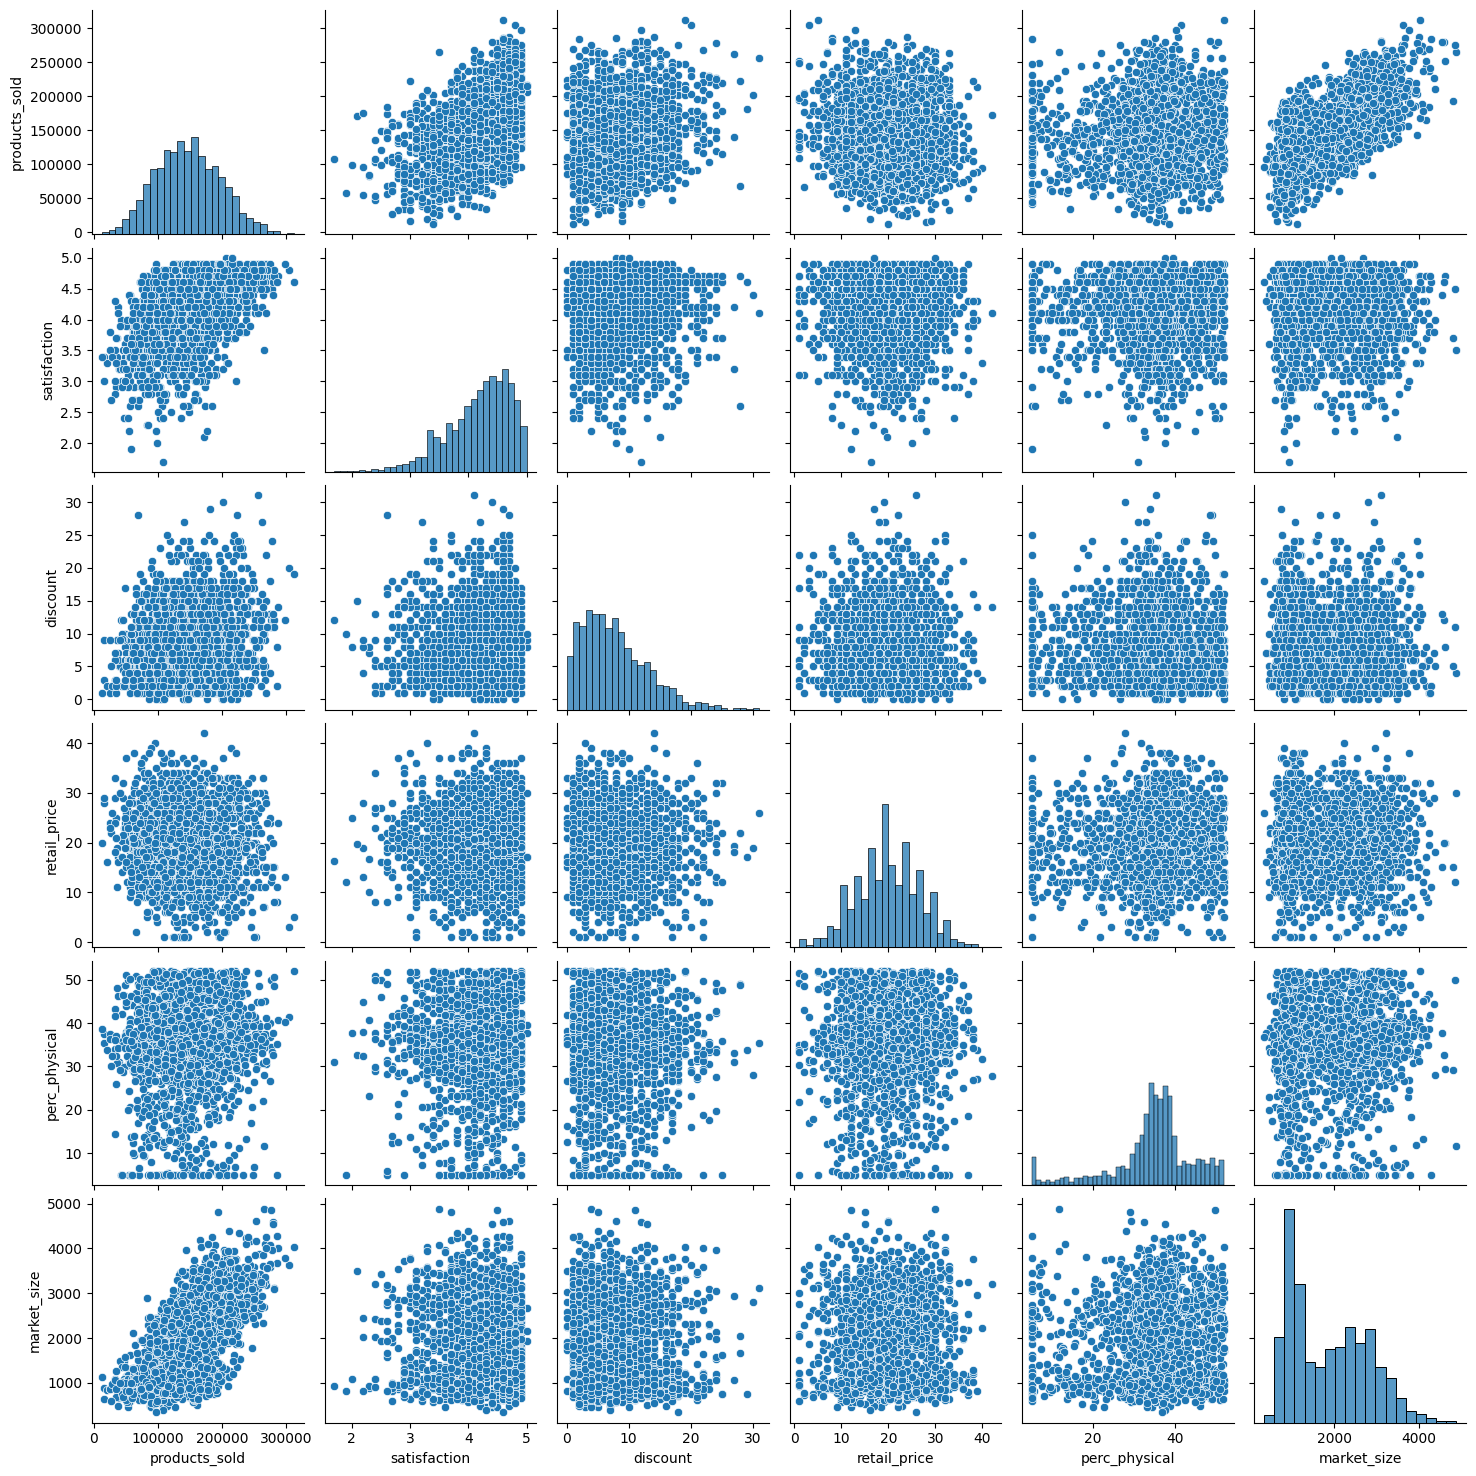

,products_sold,satisfaction,discount,retail_price,perc_physical,market_size
products_sold,1.000000,0.493717,0.160413,-0.043739,0.098517,0.700663
satisfaction,0.493717,1.000000,0.029246,-0.018082,0.080289,-0.003371
discount,0.160413,0.029246,1.000000,0.015228,-0.078529,-0.042898
retail_price,-0.043739,-0.018082,0.015228,1.000000,0.072461,0.042544
perc_physical,0.098517,0.080289,-0.078529,0.072461,1.000000,0.097119
market_size,0.700663,-0.003371,-0.042898,0.042544,0.097119,1.000000


In [38]:
# Now we will check for non-linear relationships.
 
import seaborn as sns
import matplotlib.pyplot as plt
 
# Selecting continuous variables for analysis
continuous_vars = ['products_sold', 'satisfaction', 'discount', 'retail_price', 'perc_physical', 'market_size']
 
# Plotting scatter plots for each pair of continuous variables
sns.pairplot(imputed_data[continuous_vars])
plt.show()
 
# Computing Spearman correlation coefficients
spearman_corr = imputed_data[continuous_vars].corr(method='spearman')
 
spearman_corr

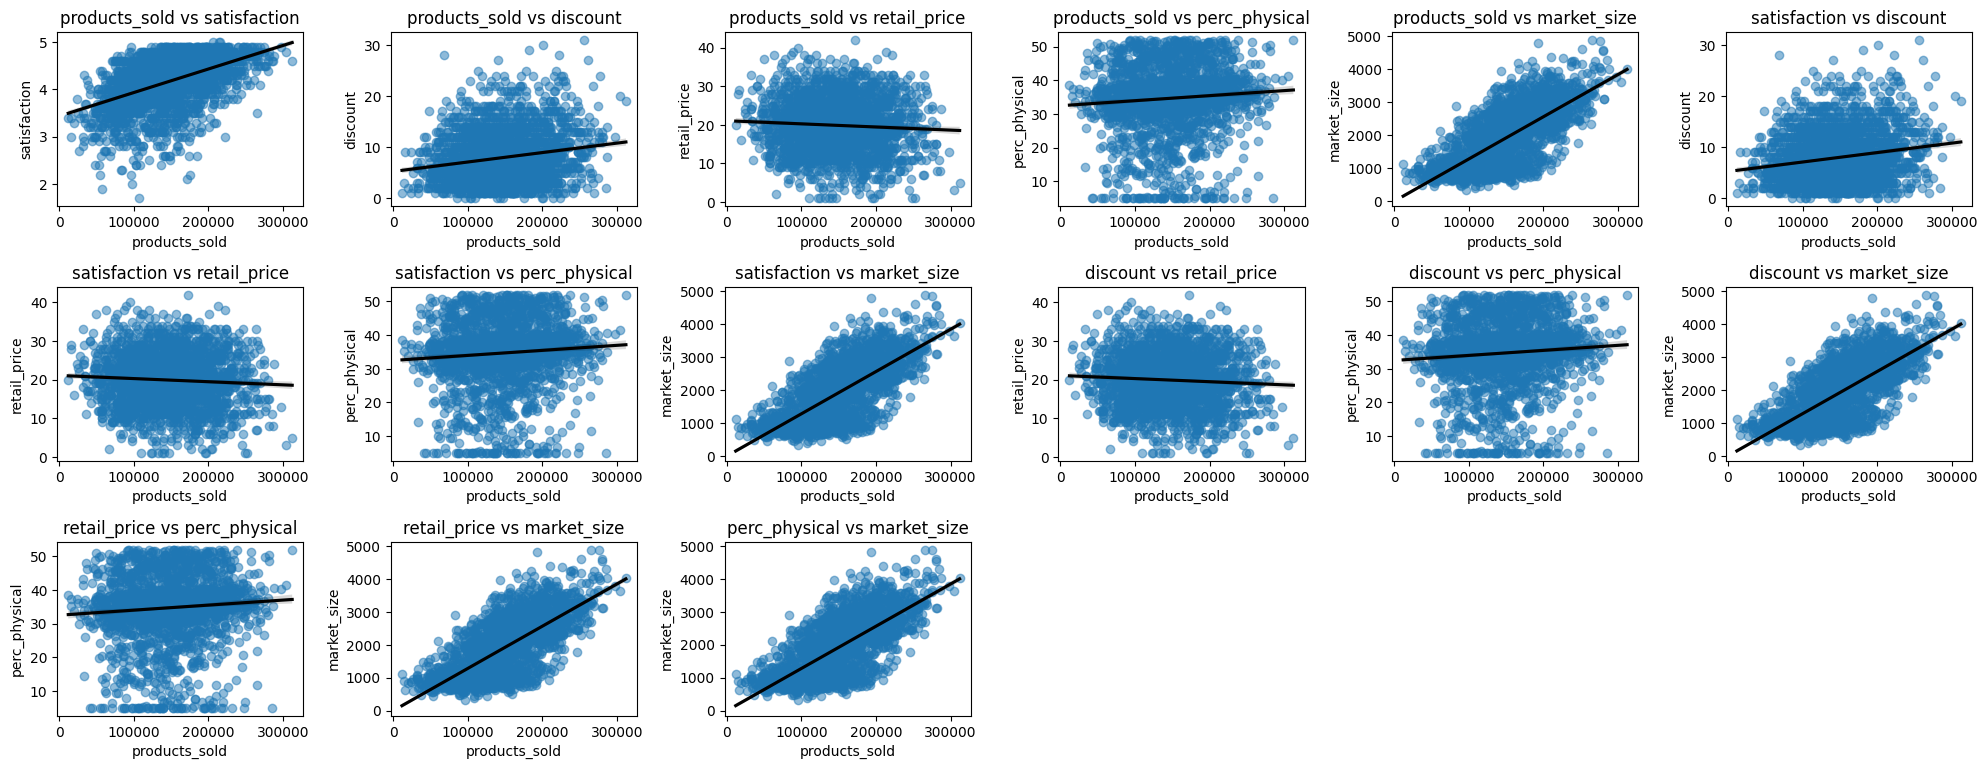

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming imputed_data is your DataFrame and continuous_vars is a list of continuous variables

# Setting up the figure size for better readability
plt.figure(figsize=(20, 15))

# Total number of continuous variables
total_vars = len(continuous_vars)

# Counter for subplot indexing
plot_number = 1

for i in range(total_vars):
    for j in range(i+1, total_vars):
        plt.subplot(total_vars, total_vars, plot_number)
        sns.regplot(x='products_sold', y=continuous_vars[j], data=imputed_data, scatter_kws={"alpha": 0.5}, line_kws={"color":"black"})
        plt.title(f'{continuous_vars[i]} vs {continuous_vars[j]}')
        
        plot_number += 1

plt.tight_layout()
plt.show()


In [40]:
# No non linear relationships, not seeing any Logaramitic, poynomial or exponential relationships.
#Dont need to transform from the dataset and it should be good for analysis

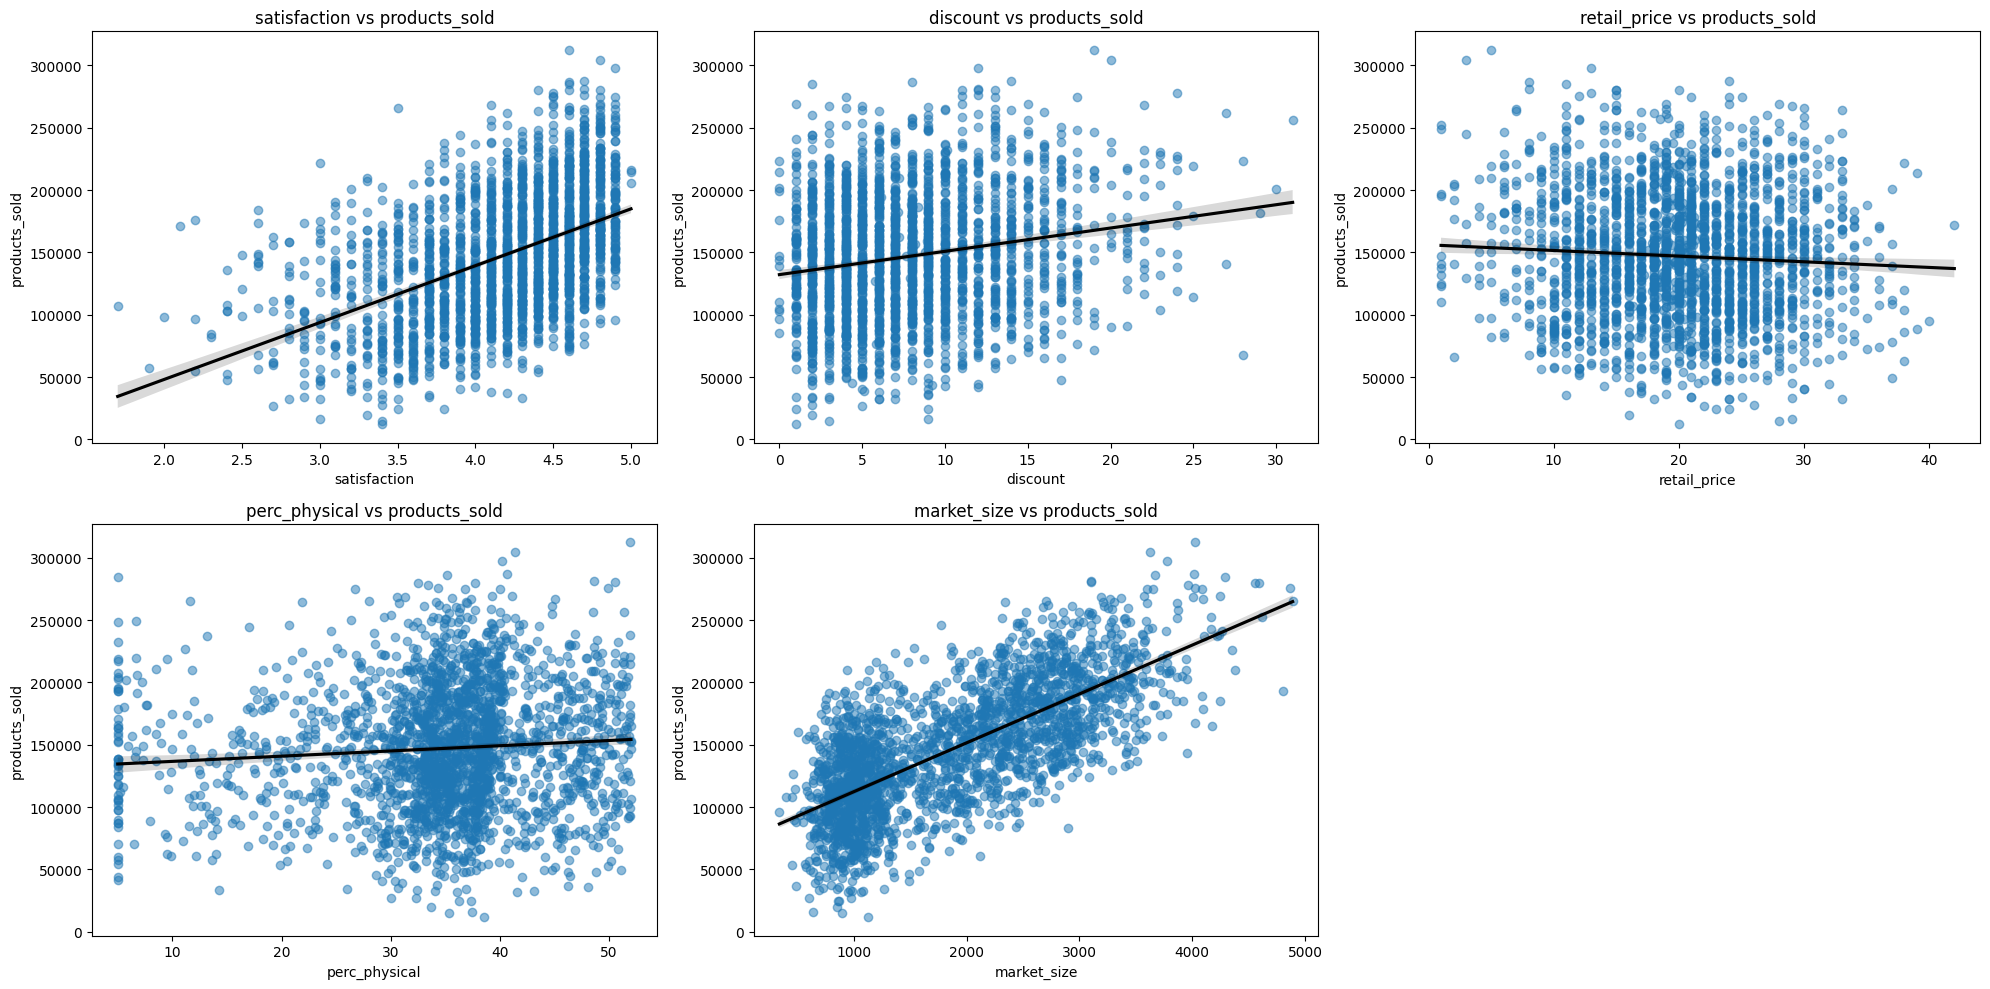

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
# List of continuous variables, ensuring 'products_sold' is included
continuous_vars = ['products_sold', 'satisfaction', 'discount', 'retail_price', 'perc_physical', 'market_size']
 
# Removing 'products_sold' from the list for the x-axis variables
x_vars = [var for var in continuous_vars if var != 'products_sold']
 
# Setting up the figure size for better readability
plt.figure(figsize=(20, 10))
 
# Iterating over the list of x-axis variables to plot against 'products_sold'
for i, var in enumerate(x_vars):
    plt.subplot(2, 3, i+1)  # Adjusting subplot grid as needed based on the number of x_vars
    sns.regplot(x=var, y='products_sold', data=imputed_data, scatter_kws={"alpha": 0.5}, line_kws={"color":"black"})
    plt.title(f'{var} vs products_sold')
 
plt.tight_layout()
plt.show()

In [42]:
# No non linear relationships, not seeing any Logaramitic, poynomial or exponential relationships.
#Dont need to transform from the dataset and it should be good for analysis

In [43]:
model_final= smf.ols('products_sold ~ health + food + other + toys + satisfaction + discount + retail_price + perc_physical + market_size', data = imputed_data).fit()
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1183.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:18:23   Log-Likelihood:                -25706.
No. Observations:                2250   AIC:                         5.143e+04
Df Residuals:                    2241   BIC:                         5.148e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -9.8e+04   3512.365    -27.902

In [44]:
model3= smf.ols('products_sold ~ health + food + other + toys', data = imputed_data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     14.96
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           4.51e-12
Time:                        13:18:23   Log-Likelihood:                -27536.
No. Observations:                2250   AIC:                         5.508e+04
Df Residuals:                    2245   BIC:                         5.511e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.864e+17   2.89e+17     -0.645      0.5